<a href="https://colab.research.google.com/github/ulwanfaqih/Portofolio/blob/main/Insight_Data_Pelanggan_Restoran.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Insight-Insight dari Data Pelanggan Restoran** *(On Progress)*
oleh : Muhammad Ulwan Faqih


---



Tujuan : Mencari Insight-Insight dari data & melihat cluster pelanggan


---


---




# Import Library

In [ ]:
import seaborn as sns



---


---




# DATA

In [ ]:
import seaborn as sns
data_resto = sns.load_dataset('tips') 
data_resto.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Data merupakan data pelanggan restoran yang diperoleh dari 'seaborn-tips'. yang berukuran 244 baris data dan 7 kolom variabel

variabel-variabel tersebut adalah :
1. total_bill = total tagihan pelanggan selama sekali kunjungan
2. tip = tip yang diberikan pelanggan selama sekali kunjungan
3. sex = jenis kelamin (male/female)
4. smoker = perokok / tidak perokok (yes/no)
5. day = hari kunjungan (thus/fri/sat/sun)
6. time = waktu kunjungan (dinner/lunch)
7. size = banyak orang sekali kunjungan (1/2/3/4/5/6)

In [ ]:
# Mengecek Keunikan Variabel
print(data_resto['size'].unique())
print(data_resto['sex'].unique())
print(data_resto['smoker'].unique())
print(data_resto['day'].unique())
print(data_resto['time'].unique())

[2 3 4 1 6 5]
['Female', 'Male']
Categories (2, object): ['Female', 'Male']
['No', 'Yes']
Categories (2, object): ['No', 'Yes']
['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Sun', 'Sat', 'Thur', 'Fri']
['Dinner', 'Lunch']
Categories (2, object): ['Dinner', 'Lunch']


In [ ]:
data_resto.shape

(244, 7)

In [ ]:
data_resto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.3 KB


meskipun data terlihat rapih, tetap harus di cek kerapihannya, **akan dilakukan pre-processing**


---


---




# Pre-Processing



---


**mengecek missing value**

In [ ]:
print(data_resto.isnull().sum())
print(data_resto.isnull().sum().sum())

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64
0


tidak ditemukan missing value


---







**mengecek duplikasi**

In [ ]:
print(data_resto.shape)
data_resto.duplicated().sum()

(244, 7)


1

ditemukan 1 duplikasi

In [ ]:
data_resto.drop_duplicates(inplace=True)
print(data_resto.duplicated().sum()) 
print(data_resto.shape) 

0
(243, 7)


data setelah dihapus duplikasi menjadi 243 baris data, dan setelah kiranya data sudah rapih, **maka selanjutnya akan dicari insight**


---



---



# Insight from Data

In [ ]:
data_resto.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4




---



**1 Variabel**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, 'Total Tagihan'),
 Text(0.5, 1.0, 'Plot Distribusi Total Tagihan')]

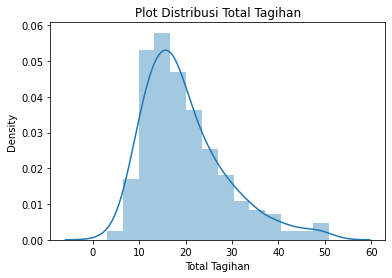

In [ ]:
p = sns.distplot(data_resto['total_bill'])
p.set(xlabel='Total Tagihan', title='Plot Distribusi Total Tagihan')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, 'Tip Pelanggan'),
 Text(0.5, 1.0, 'Plot Distribusi Tip Pelanggan')]

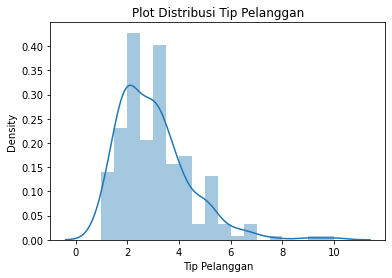

In [ ]:
p = sns.distplot(data_resto['tip'])
p.set(xlabel='Tip Pelanggan', title='Plot Distribusi Tip Pelanggan')

[Text(0, 0.5, 'Jumlah Pelanggan'),
 Text(0.5, 0, 'Jenis Kelamin'),
 Text(0.5, 1.0, 'Jumlah Pelanggan Pria dan Wanita')]

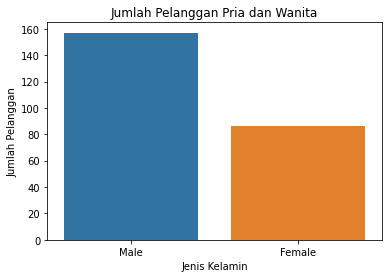

In [ ]:
p = sns.countplot(x ="sex",data=data_resto)
p.set(xlabel='Jenis Kelamin', ylabel='Jumlah Pelanggan', title='Jumlah Pelanggan Pria dan Wanita')

dapat dilihat dari visualisasi, **pelanggan pria hampir 2 kali lebih banyak dari pelanggan wanita**


---



[Text(0, 0.5, 'Jumlah Pelanggan'),
 Text(0.5, 0, 'Perokok'),
 Text(0.5, 1.0, 'Jumlah Pelanggan Perokok dan Bukan Perokok')]

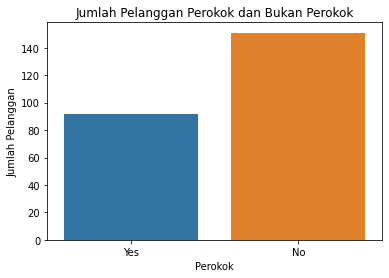

In [ ]:
p = sns.countplot(x ="smoker",data=data_resto)
p.set(xlabel='Perokok', ylabel='Jumlah Pelanggan', title='Jumlah Pelanggan Perokok dan Bukan Perokok')

dapat dilihat dari visualisasi, **lebih banyak pelanggan yang tidak merokok**


---



[Text(0, 0.5, 'Jumlah Pelanggan'),
 Text(0.5, 0, 'Hari'),
 Text(0.5, 1.0, 'Jumlah Pelanggan per Hari')]

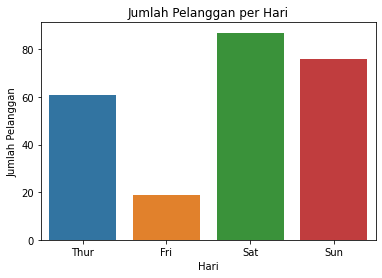

In [ ]:
p = sns.countplot(x ="day",data=data_resto)
p.set(xlabel='Hari', ylabel='Jumlah Pelanggan', title='Jumlah Pelanggan per Hari')

dapat dilihat dari visualisasi, **restoran kedatangan banyak pelanggan di hari sabtu dan minggu, dan sedikit pelanggan di hari jumat**


---



[Text(0, 0.5, 'Jumlah Pelanggan'),
 Text(0.5, 0, 'Waktu Kedatangan'),
 Text(0.5, 1.0, 'Jumlah Pelanggan menurut Waktu Kedatangan')]

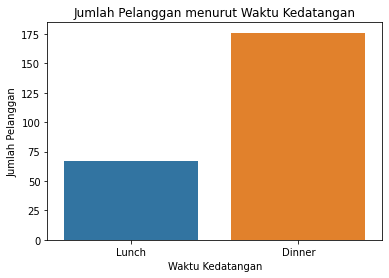

In [ ]:
p = sns.countplot(x ="time",data=data_resto)
p.set(xlabel='Waktu Kedatangan', ylabel='Jumlah Pelanggan', title='Jumlah Pelanggan menurut Waktu Kedatangan')

dapat dilihat dari visualisasi,**pelanggan restoran lebih banyak yang datang untuk makan malam dibanding makan siang**


---



[Text(0, 0.5, 'Jumlah Pelanggan'),
 Text(0.5, 0, 'Banyak Pelanggan Sekali Kunjungan'),
 Text(0.5, 1.0, 'Jumlah Banyak Pelanggan Dalam Sekali Kunjungan')]

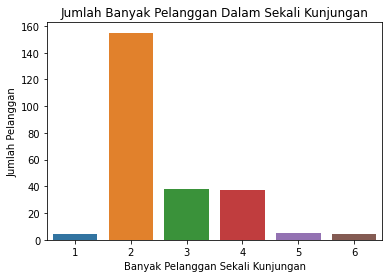

In [ ]:
p = sns.countplot(x ="size",data=data_resto)
p.set(xlabel='Banyak Pelanggan Sekali Kunjungan', ylabel='Jumlah Pelanggan', title='Jumlah Banyak Pelanggan Dalam Sekali Kunjungan')

dari visualisasi dapat terlihat, **pelanggan restoran lebih banyak datang berdua yang kemungkinan adalah pasangan**



---



**2 Variabel**

In [ ]:
data_resto.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4




---



[Text(0, 0.5, 'Total Tagihan'),
 Text(0.5, 0, 'Tip Pelanggan'),
 Text(0.5, 1.0, 'Scatter Plot Total Tagihan & Tip Pelanggan')]

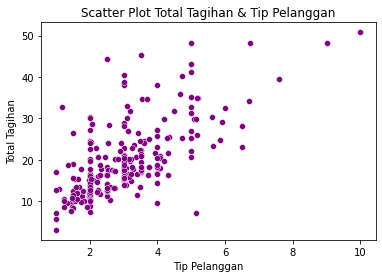

In [ ]:
p = sns.scatterplot(y=data_resto['total_bill'], x=data_resto['tip'], marker = 'o', color='purple')
p.set(xlabel='Tip Pelanggan', ylabel='Total Tagihan', title='Scatter Plot Total Tagihan & Tip Pelanggan')

dapat dilihat dari visualisasi, **semakin besar Total Tagihan, relatif semakin besar juga Tip yang diberikan**


---



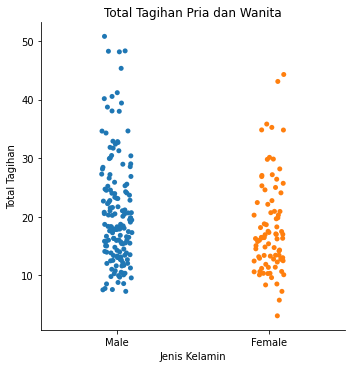

In [ ]:
p = sns.catplot(x="sex", y="total_bill", data=data_resto)
p.set(xlabel='Jenis Kelamin', ylabel='Total Tagihan', title='Total Tagihan Pria dan Wanita')

dapat dilihat dari visualisasi, **dari pelanggan pria ataupun wanita keduanya relatif menghabiskan uangnya dalam jumlah yang sama, kebanyakan di nilai sekitar 10-30**


---



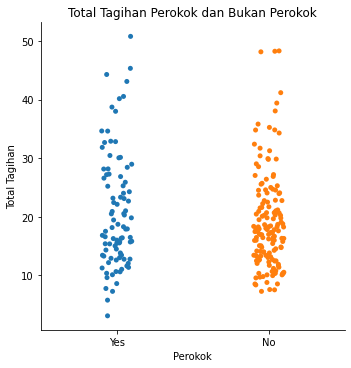

In [ ]:
p = sns.catplot(x="smoker", y="total_bill", data=data_resto)
p.set(xlabel='Perokok', ylabel='Total Tagihan', title='Total Tagihan Perokok dan Bukan Perokok')

dapat dilihat dari visualisasi, **dari pelanggan perokok ataupun bukan keduanya relatif menghabiskan uangnya dalam jumlah yang sama, kebanyakan di nilai sekitar 10-30**


---



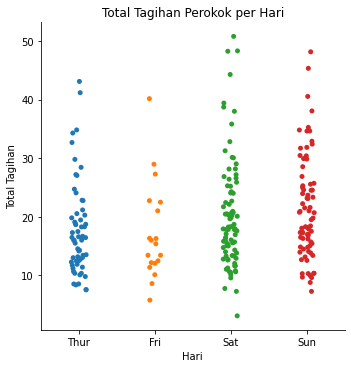

In [ ]:
p = sns.catplot(x="day", y="total_bill", data=data_resto)
p.set(xlabel='Hari', ylabel='Total Tagihan', title='Total Tagihan Perokok per Hari')

dapat dilihat dari visualisasi, **dari pelanggan dihari kamis-minggu, semuanya relatif menghabiskan uangnya dalam jumlah yang sama, kebanyakan di nilai sekitar 10-30**


---



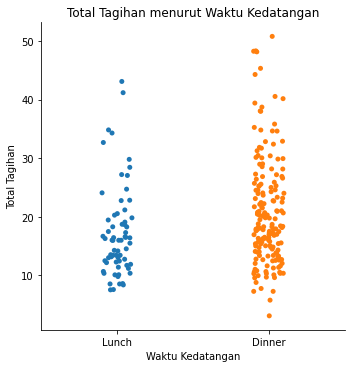

In [ ]:
p = sns.catplot(x="time", y="total_bill", data=data_resto)
p.set(xlabel='Waktu Kedatangan', ylabel='Total Tagihan', title='Total Tagihan menurut Waktu Kedatangan')

karena pengunjung makan malam lebih banyak, **dapat dilihat dari visualiasi, total tagihan yang dihabiskan di makan malam relatif lebih banyak dari yang makan siang, makan siang(sekitar 7,5-30) makan malam(sekitar 7,5-40)**


---



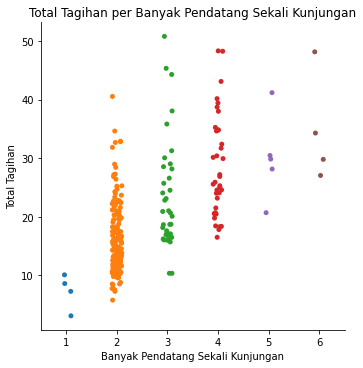

In [ ]:
p = sns.catplot(x="size", y="total_bill", data=data_resto)
p.set(xlabel='Banyak Pendatang Sekali Kunjungan', ylabel='Total Tagihan', title='Total Tagihan per Banyak Pendatang Sekali Kunjungan')

dapat dilihat dari visualisasi, **semakin besar pendatang sekali kunjungan relatif semakin besar juga Total Tagihannya**


---



In [ ]:
data_resto.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


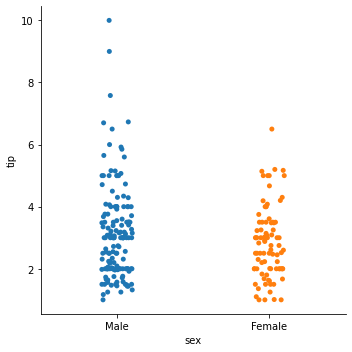

In [ ]:
p = sns.catplot(x="sex", y="tip", data=data_resto)

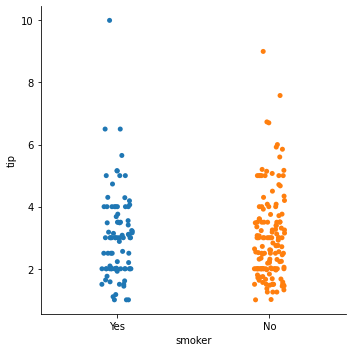

In [ ]:
p = sns.catplot(x="smoker", y="tip", data=data_resto)

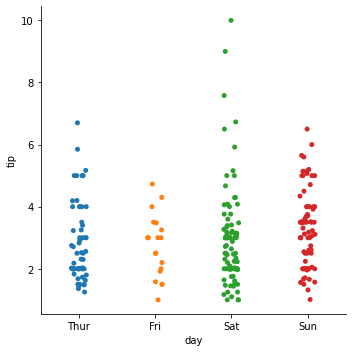

In [ ]:
p = sns.catplot(x="day", y="tip", data=data_resto)

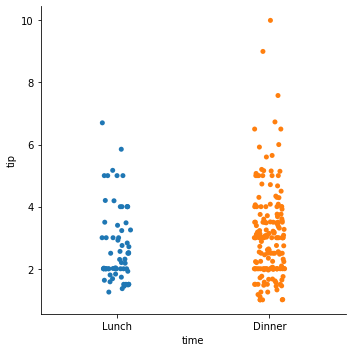

In [ ]:
p = sns.catplot(x="time", y="tip", data=data_resto)

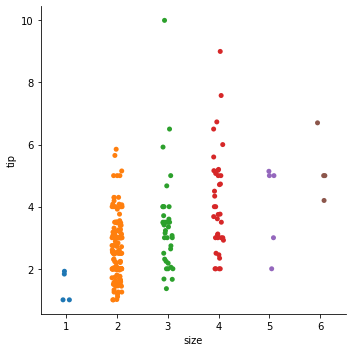

In [ ]:
p = sns.catplot(x="size", y="tip", data=data_resto)

In [ ]:
data_resto.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


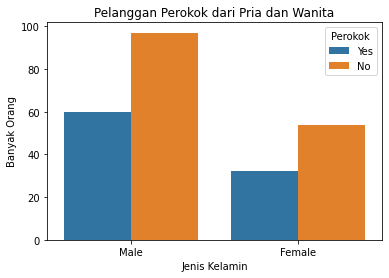

In [ ]:
p = sns.countplot(x="sex", hue="smoker", data=data_resto)
p.set(xlabel='Jenis Kelamin', ylabel='Banyak Orang', title='Pelanggan Perokok dari Pria dan Wanita')
p.legend(title = "Perokok", loc = 0)

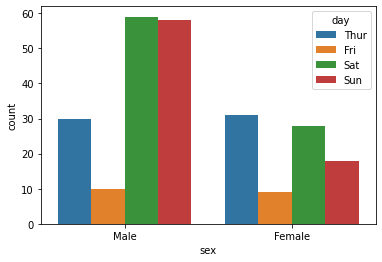

In [ ]:
p = sns.countplot(x="sex", hue="day", data=data_resto)

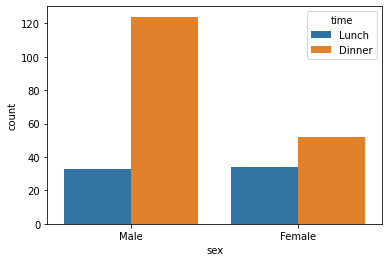

In [ ]:
p = sns.countplot(x="sex", hue="time", data=data_resto)

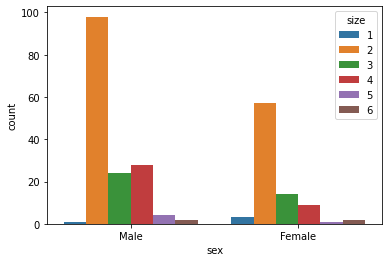

In [ ]:
p = sns.countplot(x="sex", hue="size", data=data_resto)

In [ ]:
data_resto.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


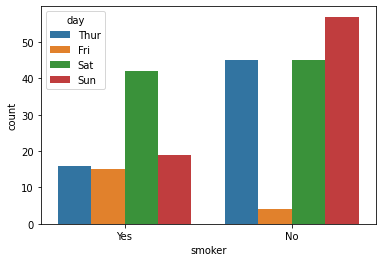

In [ ]:
p = sns.countplot(x="smoker", hue="day", data=data_resto)

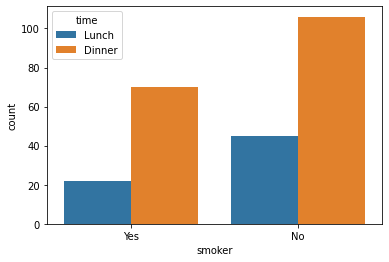

In [ ]:
p = sns.countplot(x="smoker", hue="time", data=data_resto)

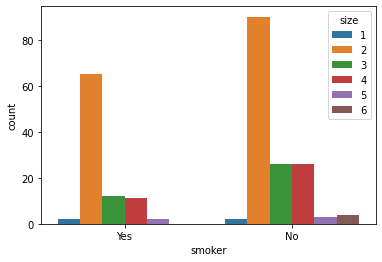

In [ ]:
p = sns.countplot(x="smoker", hue="size", data=data_resto)

In [ ]:
data_resto.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


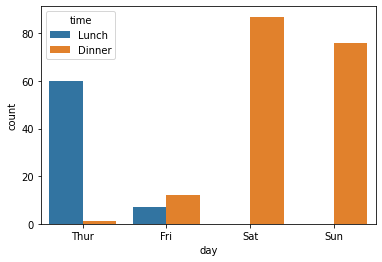

In [ ]:
p = sns.countplot(x="day", hue="time", data=data_resto)

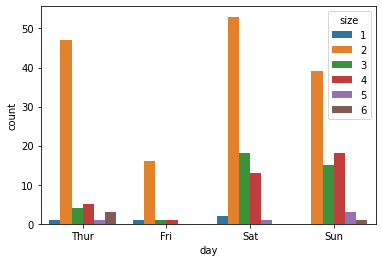

In [ ]:
p = sns.countplot(x="day", hue="size", data=data_resto)

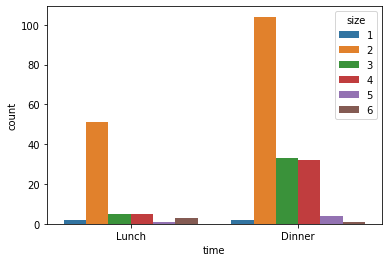

In [ ]:
p = sns.countplot(x="time", hue="size", data=data_resto)



---



**3 Variabel**

In [ ]:
data_resto.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 14.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


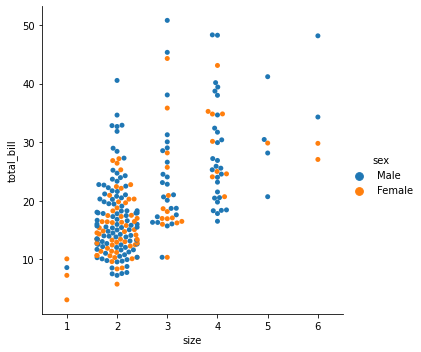

In [ ]:
p= sns.catplot(x= "size", y="total_bill", hue ="sex" , kind ="swarm",data=data_resto)

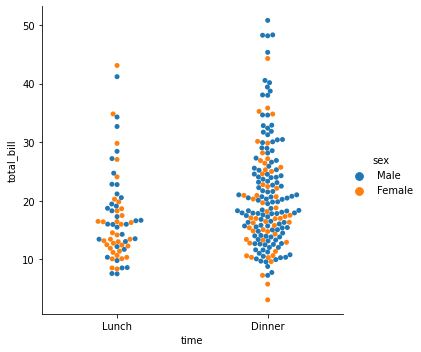

In [ ]:
p= sns.catplot(x= "time", y="total_bill", hue ="sex" , kind ="swarm",data=data_resto)

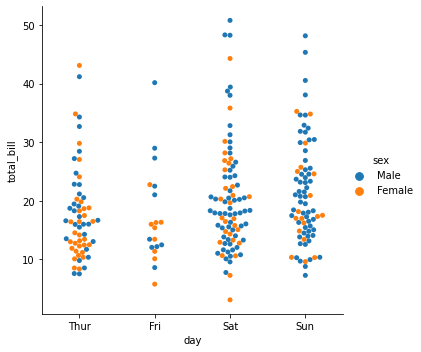

In [ ]:
p= sns.catplot(x= "day", y="total_bill", hue ="sex" , kind ="swarm",data=data_resto)

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 33.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 50.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 22.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 59.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 40.0% of the points cannot be placed; y

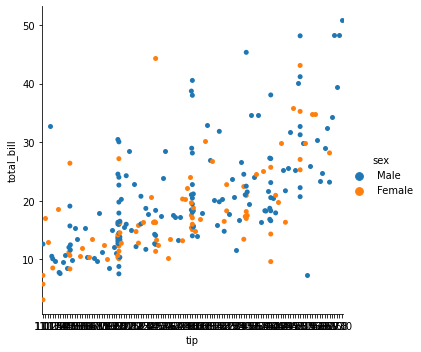

In [ ]:
p= sns.catplot(x= "tip", y="total_bill", hue ="sex" , kind ="swarm",data=data_resto)

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 33.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 50.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 22.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 59.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 40.0% of the points cannot be placed; y

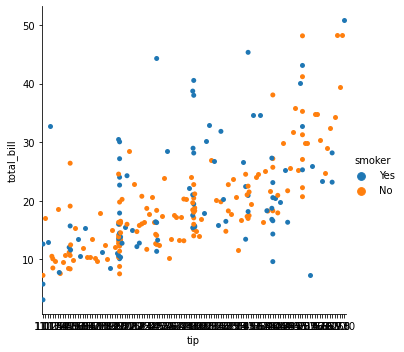

In [ ]:
p= sns.catplot(x= "tip", y="total_bill", hue ="smoker" , kind ="swarm",data=data_resto)

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 33.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 50.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 22.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 59.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 40.0% of the points cannot be placed; y

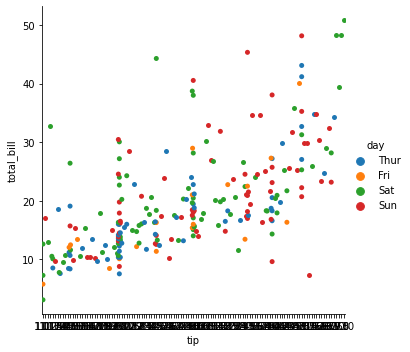

In [ ]:
p= sns.catplot(x= "tip", y="total_bill", hue ="day" , kind ="swarm",data=data_resto)

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 33.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 50.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 22.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 59.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 40.0% of the points cannot be placed; y

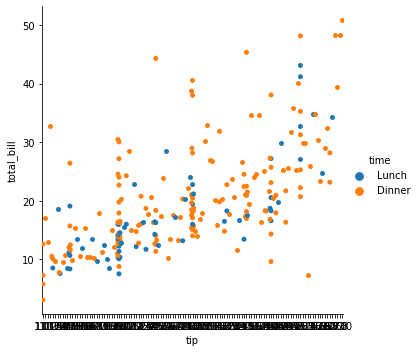

In [ ]:
p= sns.catplot(x= "tip", y="total_bill", hue ="time" , kind ="swarm",data=data_resto)

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 33.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 50.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 22.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 59.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 40.0% of the points cannot be placed; y

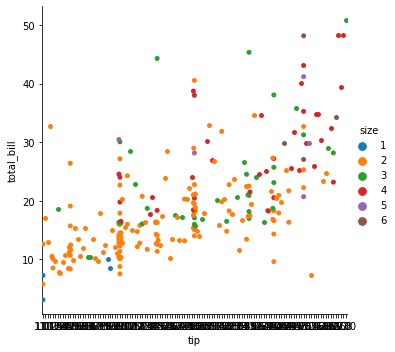

In [ ]:
p= sns.catplot(x= "tip", y="total_bill", hue ="size" , kind ="swarm",data=data_resto)

# Cluster Pelanggan